In [7]:
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pptoolbox.preprocessing import SNV, MSC, SavitzkyGolay, Detrend
from pptoolbox.visualization import (plot_spectra, plot_loadings, plot_scree, fit_pca,
                                               generate_pc_df, plot_svp, initialize_theme,spectral_vector_properties)

# plotly.offline.init_notebook_mode()
# qualitative_cmap, diverging_cmap, light_cmap = initialize_theme()

# import data

In [8]:
version = "v2"

import_folder = Path("../data/processed") / version / "full"

X = pd.read_csv(import_folder / "input.csv", index_col=0)
y = pd.read_csv(import_folder / "label.csv", index_col=0)
y_meta = pd.read_csv(import_folder / "meta.csv", index_col=0)

print(f"Shapes of X, y, y_meta: {X.shape}, {y.shape}, {y_meta.shape}")

Shapes of X, y, y_meta: (342, 191), (342, 1), (342, 4)


In [9]:
param_label_map = {}

for col in y.columns:
    if y[col].dtype == 'float64':
        param_label_map[col] = 'reg'
    elif y[col].dtype == 'object':
        param_label_map[col] = 'clf'
    elif col == 'year_month':
        param_label_map[col] = 'clf'

print(param_label_map)

{'Condition': 'clf'}


# No Preprocessing

In [10]:
PREPROCESSING = 'No Preprocessing'
SAMPLE_TYPE = 'Ethanol'
output_dir = Path(f"../data/visualisation") / version / PREPROCESSING
output_dir.mkdir(parents=True, exist_ok=True)

In [11]:
for param, label_type in param_label_map.items():

    filename = f"spectra_{param}.png"
    plot_df = X.copy()
    
    # check if png exists
    if (output_dir / filename).exists():
        print(f"Skipping {param}")
        continue

    

    print(f'Generating figure for {param}')
    plot_spectra(plot_df, labels=y[[param]],
                label_type=label_type,
                spec_prep=PREPROCESSING,
                sample_type=SAMPLE_TYPE,
                # cmap=cmap
                )
    
    plt.savefig(output_dir / filename, bbox_inches='tight')
    plt.show()
    plt.close()

Skipping Condition


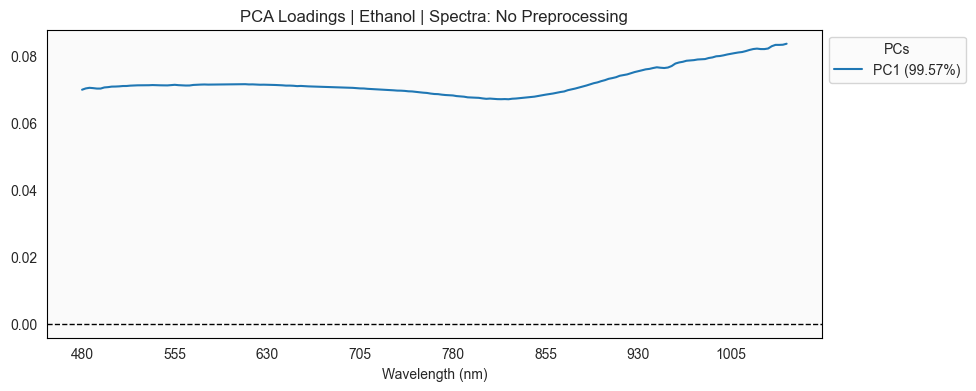

Total Explained Variance: 99.566% 
Number of Components: 1


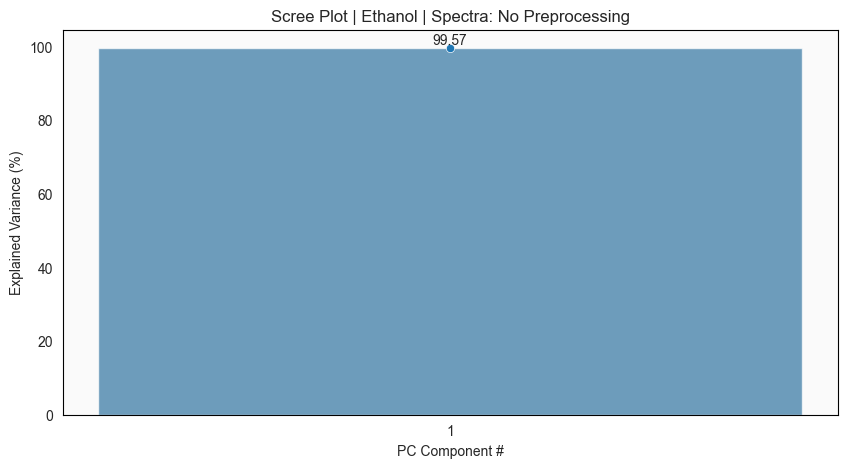

In [12]:
N_COMP = 0.99
RANDOM_STATE = 42

fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)

fig2, ax2 = plot_loadings(plot_df, fitted_pc, pc_labels, 
                        spec_prep=PREPROCESSING, 
                        sample_type=SAMPLE_TYPE)

plt.savefig(output_dir / "pca_loadings.png", bbox_inches='tight')
plt.show()
plt.close()

fig1, ax1 = plot_scree(fitted_pc,
                    spec_prep=PREPROCESSING, 
                    sample_type=SAMPLE_TYPE)
print(f"""Total Explained Variance: {fitted_pc.explained_variance_ratio_.sum()*100:.3f}% 
Number of Components: {len(fitted_pc.explained_variance_ratio_)}""")

plt.savefig(output_dir / "scree_plot.png", bbox_inches='tight')
plt.show()
plt.close()

In [13]:
for param in param_label_map.keys():
    # check if png exists
    if (output_dir / f"pca_{param}.png").exists():
        print(f"Skipping {param}")
        continue

    print(f'Generating figure for {param}')
    pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=y[[param]])
    sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param)
    plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)

    plt.savefig(output_dir / f"pca_{param}.png", bbox_inches='tight')
    plt.show()
    plt.close()

Skipping Condition


# SNV

In [14]:
# CONFIGS
PREPROCESSING = 'SNV'
output_dir = Path(f"../data/visualisation") / version / PREPROCESSING
output_dir.mkdir(parents=True, exist_ok=True)

Generating figure for Condition


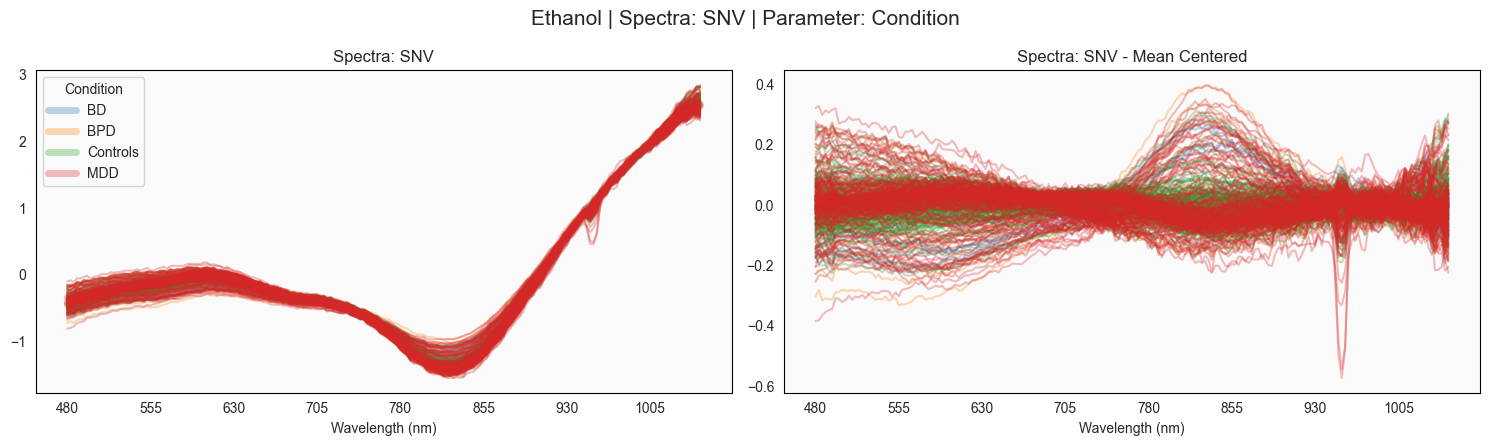

In [15]:
snv_df = pd.DataFrame(SNV().fit_transform(X), columns=X.columns, index=X.index)
plot_df = snv_df.copy()

for param, label_type in param_label_map.items():
    # # check if png exists
    # if (output_dir / f"spectra_{param}.png").exists():
    #     print(f"Skipping {param}")
    #     continue
    
    print(f'Generating figure for {param}')
    plot_spectra(plot_df, labels=y[[param]],
                label_type=label_type,
                spec_prep=PREPROCESSING,
                sample_type=SAMPLE_TYPE,
                # cmap=cmap
                )
    
    plt.savefig(output_dir / f"spectra_{param}.png", bbox_inches='tight')
    plt.show()
    plt.close()

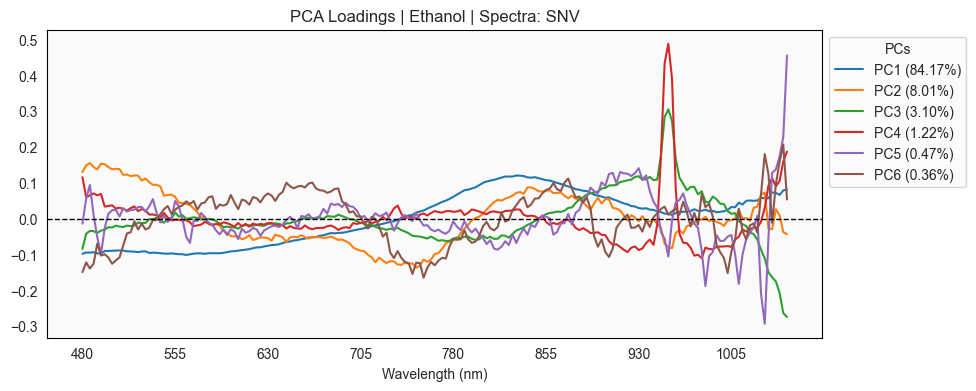

Total Explained Variance: 97.321% 
Number of Components: 6


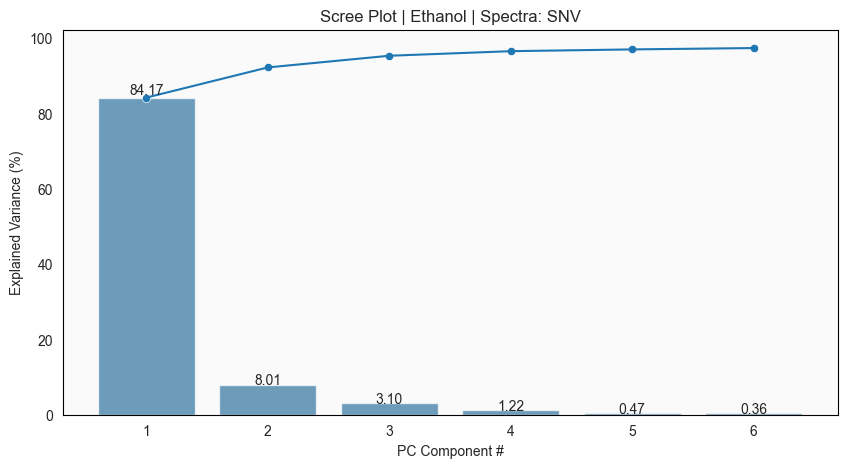

In [17]:
N_COMP = 0.97
RANDOM_STATE = 42

fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)

fig2, ax2 = plot_loadings(plot_df, fitted_pc, pc_labels, 
                        spec_prep=PREPROCESSING, 
                        sample_type=SAMPLE_TYPE)

plt.savefig(output_dir / "pca_loadings.png", bbox_inches='tight')
plt.show()
plt.close()

fig1, ax1 = plot_scree(fitted_pc,
                    spec_prep=PREPROCESSING, 
                    sample_type=SAMPLE_TYPE)
print(f"""Total Explained Variance: {fitted_pc.explained_variance_ratio_.sum()*100:.3f}% 
Number of Components: {len(fitted_pc.explained_variance_ratio_)}""")

plt.savefig(output_dir / "scree_plot.png", bbox_inches='tight')
plt.show()
plt.close()

Generating figure for Condition


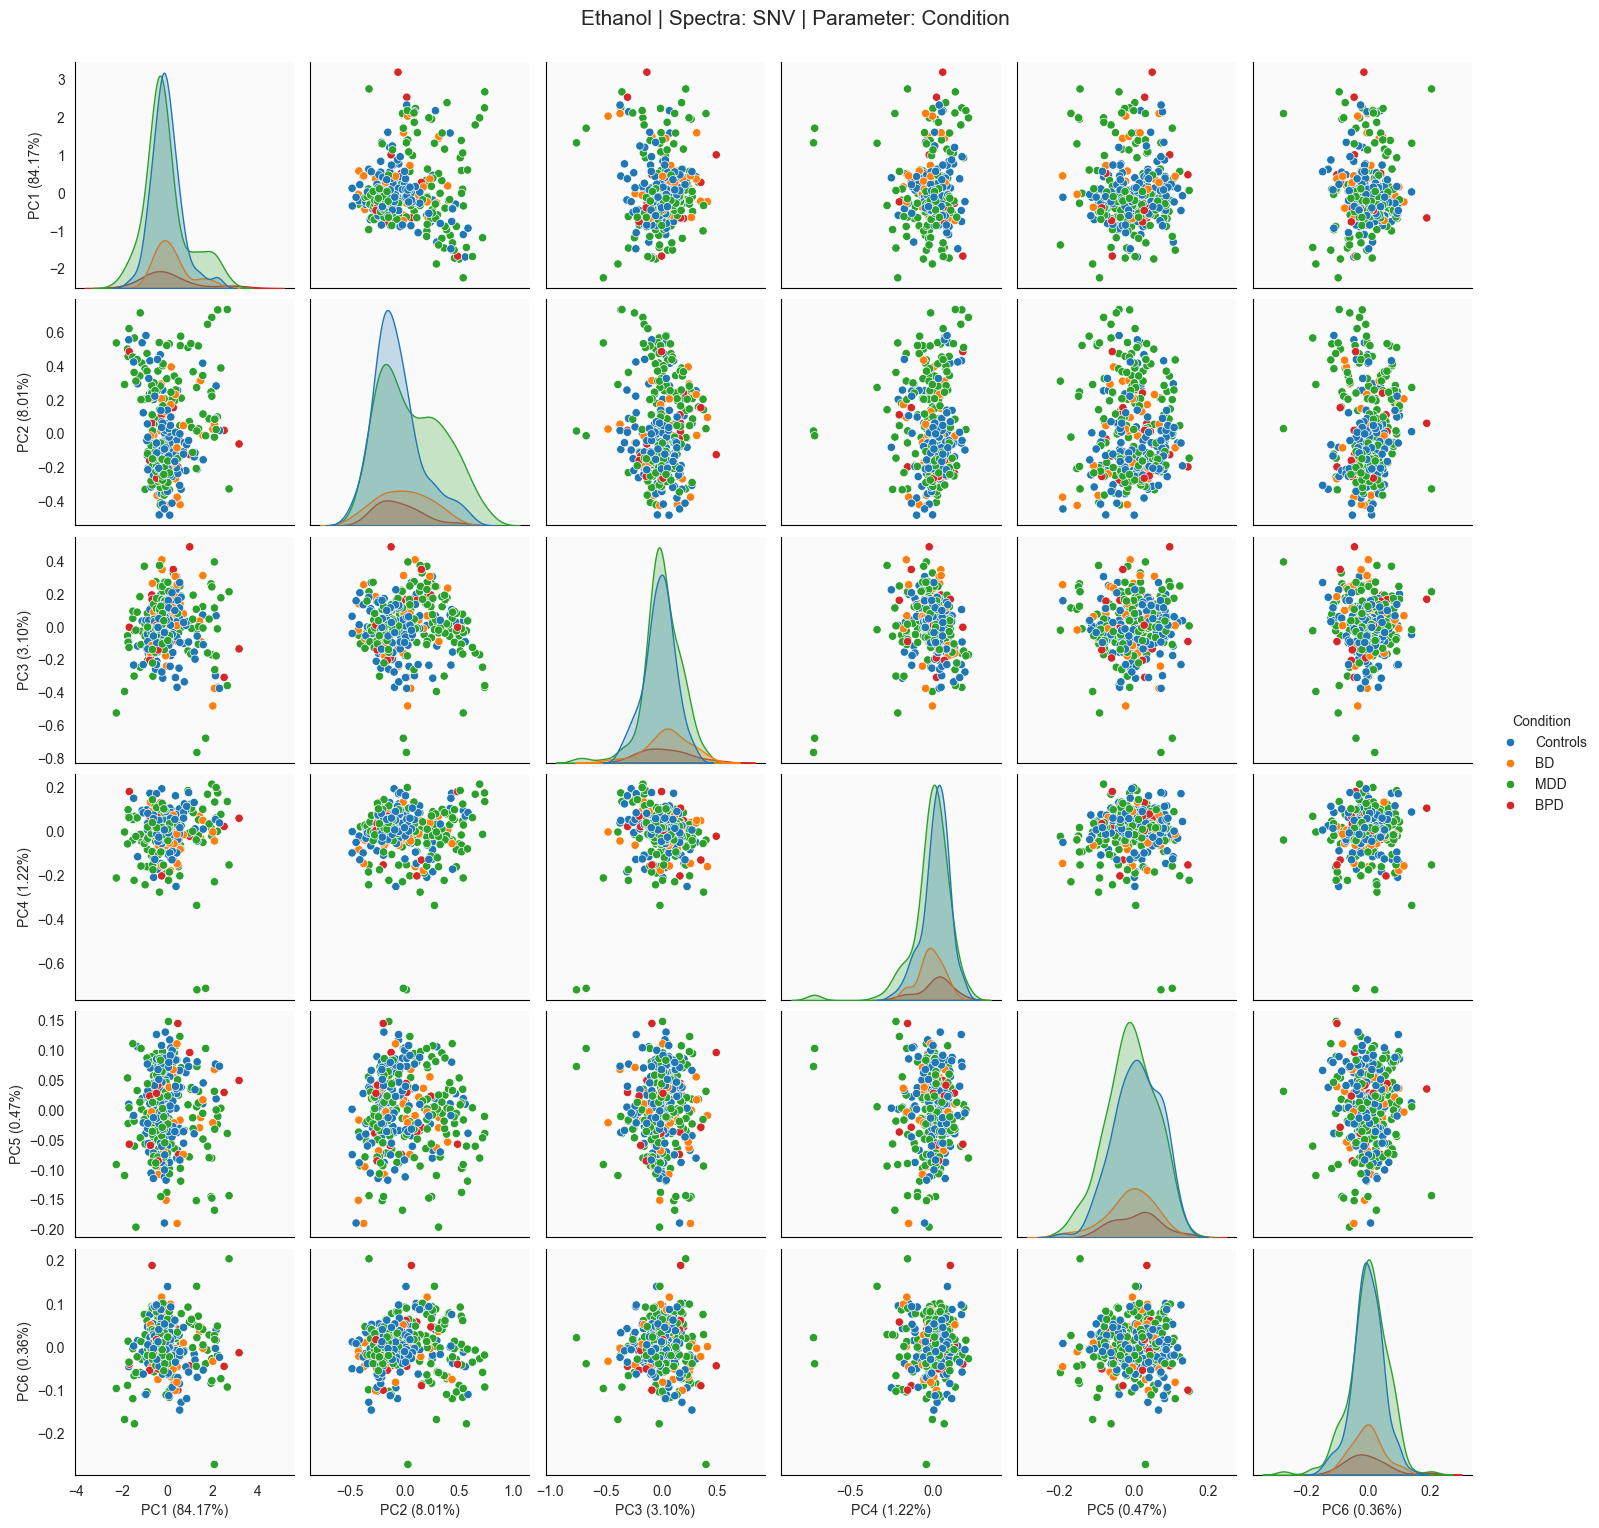

In [18]:
for param in param_label_map.keys():
    # check if png exists
    if (output_dir / f"pca_{param}.png").exists():
        print(f"Skipping {param}")
        continue

    print(f'Generating figure for {param}')
    pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=y[[param]])
    sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param)
    plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)

    plt.savefig(output_dir / f"pca_{param}.png", bbox_inches='tight')
    plt.show()
    plt.close()

# obtain outliers by PCA distance

In [ ]:
# for selection in selections:
#     if selection != 'dry':
#         continue
#     plot_df = selections[selection]['plot_df']
#     pca_scores = fitted_pc.fit_transform(plot_df)

#     # get index of the PCA scores > 18 in PC1
#     high_scores = np.where(pca_scores[:, 0] > 10)[0]

#     # # Calculate the center of the PCA scores
#     # center = np.mean(pca_scores, axis=0)

#     # # Calculate Euclidean distances from the center
#     # distances = np.sqrt(np.sum((pca_scores - center) ** 2, axis=1))

#     # # Set a threshold for outliers
#     # threshold = np.percentile(distances, 70) # percentile
#     # outliers = distances > threshold

#     # print(f'Number of outliers: {outliers.sum()}')

#     selected_labels = selections[selection]['cleaned_label']

#     outlier_df = selected_labels.iloc[high_scores].reset_index().drop_duplicates(subset='lot_id')
#     display(outlier_df)

In [ ]:
# fig = make_subplots(rows=3, cols= 2, 
#                     subplot_titles=['F Test Spectra', 'F Test PCA', 
#                                     'Mutual Info Spectra', 'Mutual Info PCA',
#                                     'Chi2 Spectra', 'Chi2 PCA'],
#                     specs=[[{'secondary_y': True}, {'secondary_y': True}],
#                            [{'secondary_y': False}, {'secondary_y': False}],
#                            [{'secondary_y': True}, {'secondary_y': True}]],
#                     horizontal_spacing=0.15,
#                     vertical_spacing=0.1)

# title = f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING}'
# colors = px.colors.qualitative.Plotly
# pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df)
# n_comp = fitted_pc.n_components_

# for i, param in enumerate(param_label_map.keys()):
#     try:
#         f_reg_spec = f_classif(plot_df, label_df[param].values.ravel())
#         f_reg_pca = f_classif(pc_df.iloc[:, :n_comp], pc_df[param].values.ravel())
#         mms = MinMaxScaler()
#         scaled_spec = mms.fit_transform(plot_df)
#         scaled_pca = mms.fit_transform(pc_df.iloc[:, :n_comp])
#         mi_spec = mutual_info_classif(scaled_spec, label_df[param].values.ravel())
#         mi_pca = mutual_info_classif(scaled_pca, pc_df[param].values.ravel())
#         chi2_spec = chi2(scaled_spec, label_df[param].values.ravel())
#         chi2_pca = chi2(scaled_pca, pc_df[param].values.ravel())
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=mi_spec, marker_color=colors[i], name=param,
#                        opacity=0.8, showlegend=False),
#                        secondary_y=False,row=2, col=1)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=mi_pca, name=param, marker_color=colors[i],
#                        showlegend=False, opacity=0.8),
#                     secondary_y=False, row=2, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=2)
        
#     except:
#         pass

# # Add figure title
# fig.update_layout(title_text=title, height=1400, width=1400)
# fig.update_xaxes(title_text="Wavelengths (nm)", col=1)
# fig.update_xaxes(title_text="No. of PCs", col=2)

# # Set y-axes titles
# fig.update_yaxes(title_text="F value", secondary_y=False, row=1)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=1)
# fig.update_yaxes(title_text="Mutual Information", secondary_y=False, row=2)
# fig.update_yaxes(title_text="Chi2", secondary_y=False, row=3)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=3)

# fig.show()

# SG1D9W2P

In [19]:
# CONFIGS
PREPROCESSING = 'SG1D9W2P'
output_dir = Path(f"../data/visualisation") / version / PREPROCESSING
output_dir.mkdir(parents=True, exist_ok=True)

Generating figure for Condition


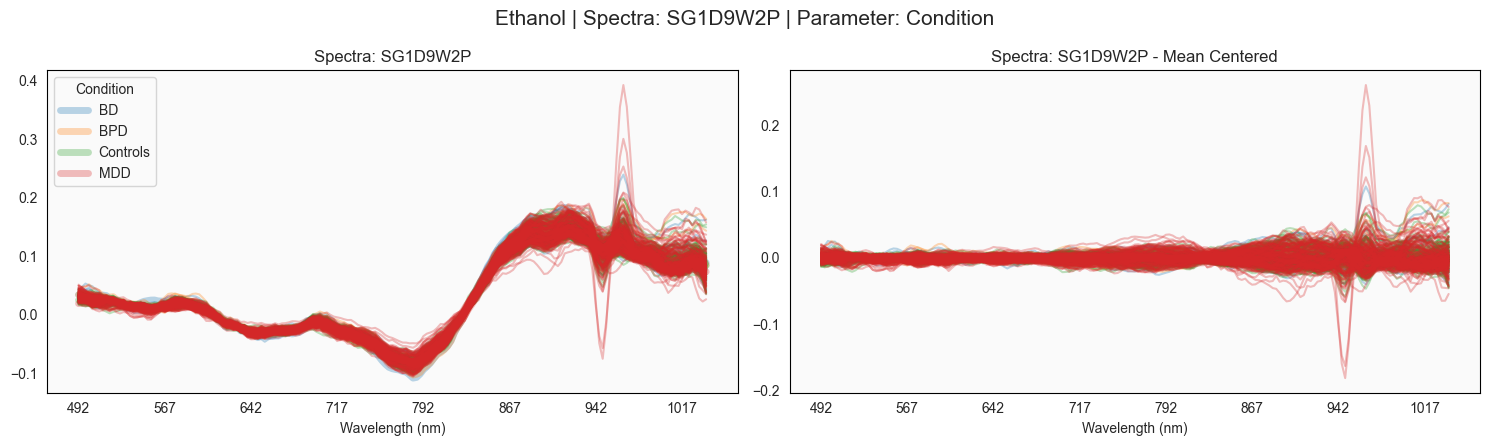

In [20]:
msc = SavitzkyGolay(deriv=1, window=9, polyorder=2)
msc_df = pd.DataFrame(msc.fit_transform(X), 
                    columns=X.columns[4:-4], index=X.index)
plot_df = msc_df.copy()

for param, label_type in param_label_map.items():
    # # check if png exists
    # if (output_dir / f"spectra_{param}.png").exists():
    #     print(f"Skipping {param}")
    #     continue
    
    print(f'Generating figure for {param}')
    plot_spectra(plot_df, labels=y[[param]],
                label_type=label_type,
                spec_prep=PREPROCESSING,
                sample_type=SAMPLE_TYPE,
                # cmap=cmap
                )
    
    plt.savefig(output_dir / f"spectra_{param}.png", bbox_inches='tight')
    plt.show()
    plt.close()

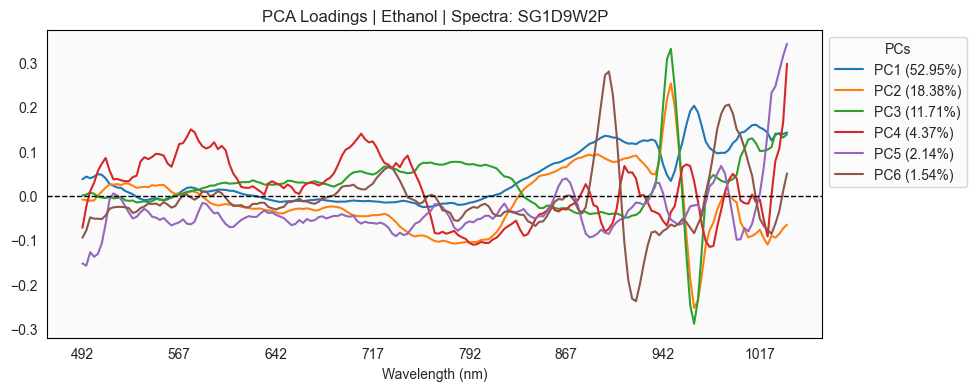

Total Explained Variance: 91.081% 
Number of Components: 6


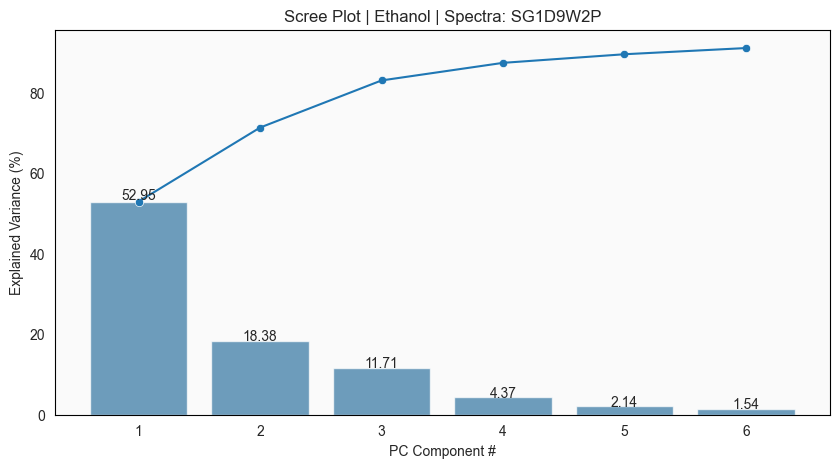

In [23]:
N_COMP = 0.90
RANDOM_STATE = 42

fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)

fig2, ax2 = plot_loadings(plot_df, fitted_pc, pc_labels, 
                        spec_prep=PREPROCESSING, 
                        sample_type=SAMPLE_TYPE)

plt.savefig(output_dir / "pca_loadings.png", bbox_inches='tight')
plt.show()
plt.close()

fig1, ax1 = plot_scree(fitted_pc,
                    spec_prep=PREPROCESSING, 
                    sample_type=SAMPLE_TYPE)
print(f"""Total Explained Variance: {fitted_pc.explained_variance_ratio_.sum()*100:.3f}% 
Number of Components: {len(fitted_pc.explained_variance_ratio_)}""")

plt.savefig(output_dir / "scree_plot.png", bbox_inches='tight')
plt.show()
plt.close()

Generating figure for Condition


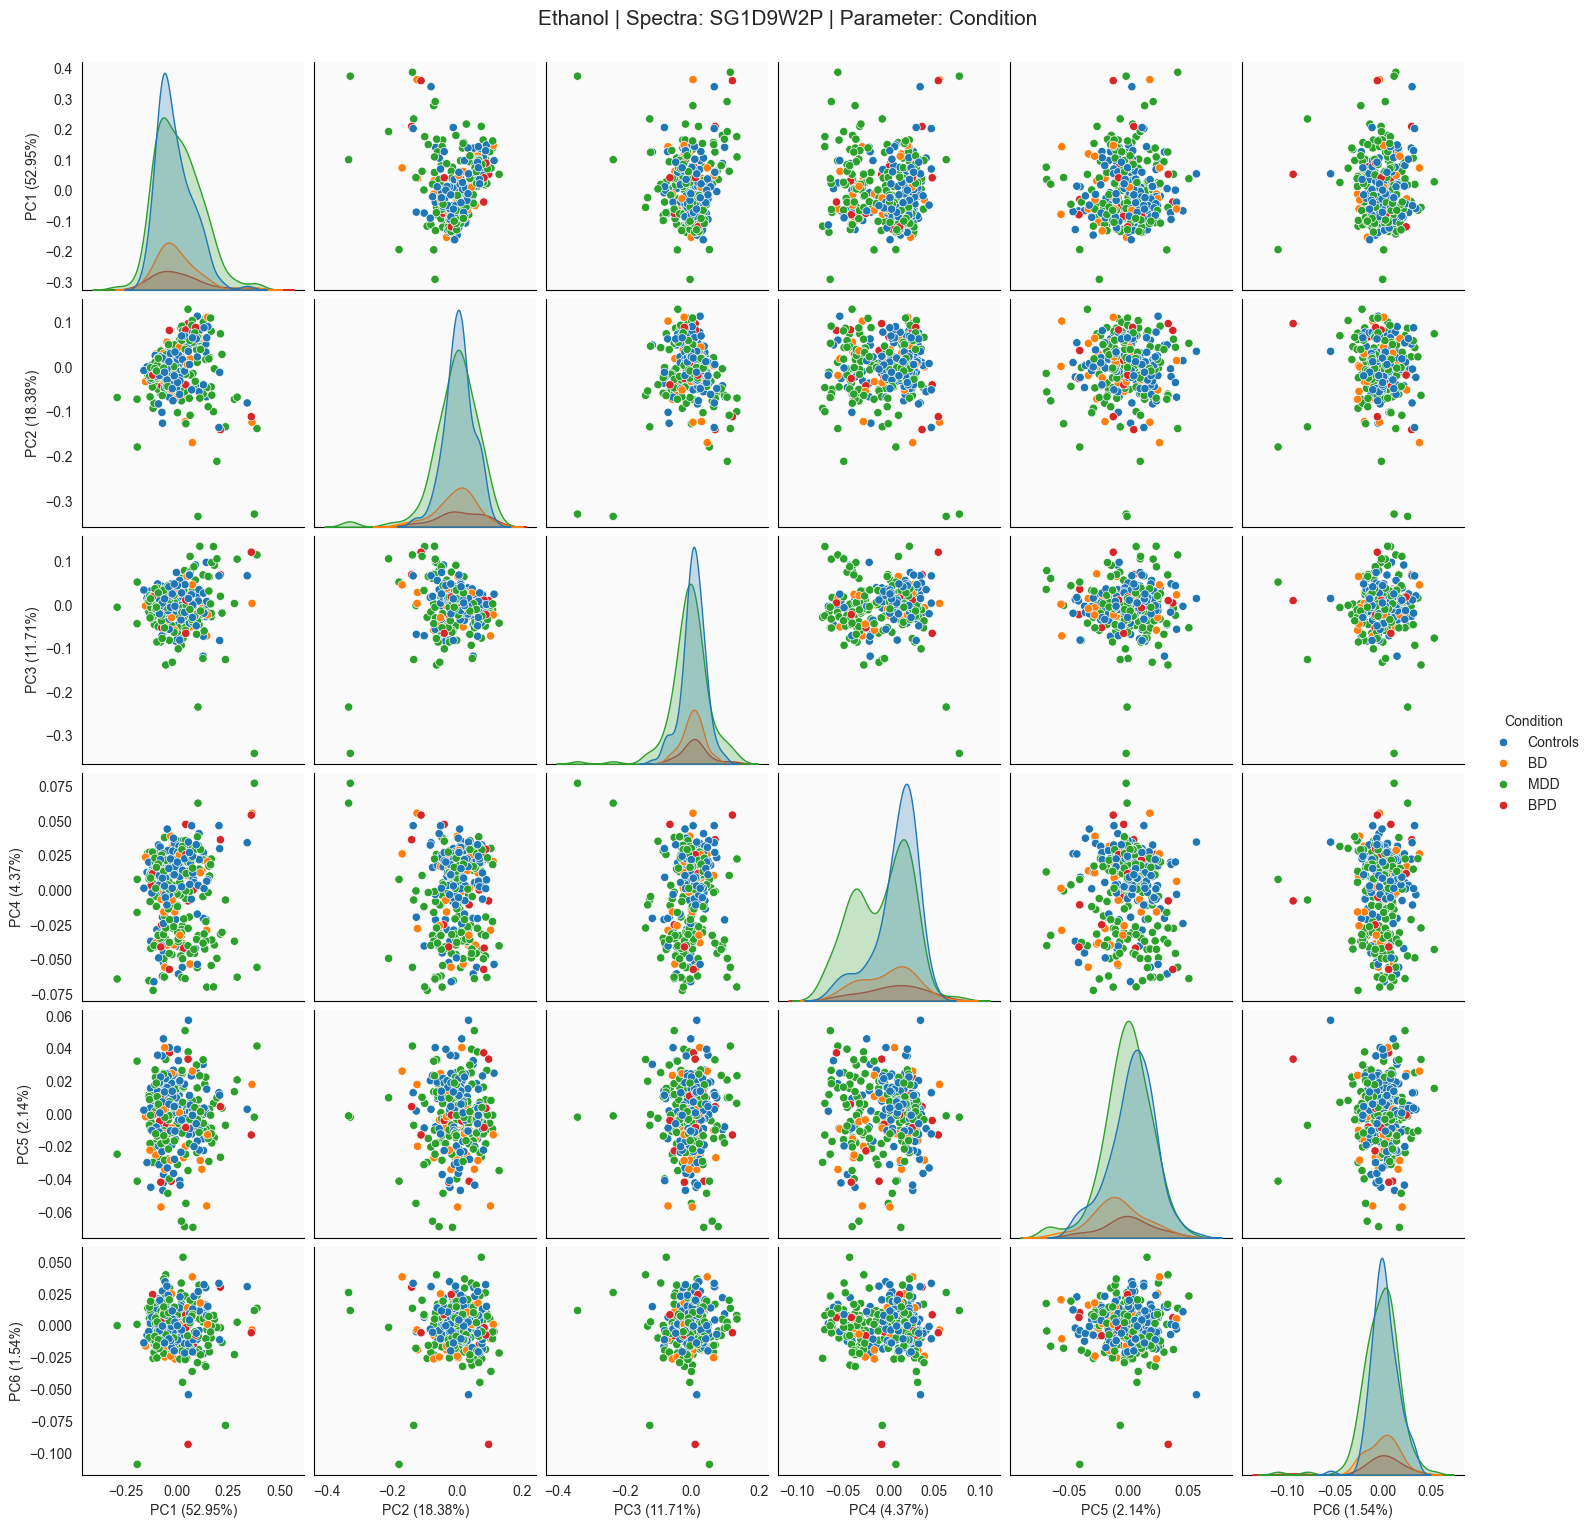

In [24]:
for param in param_label_map.keys():
    # check if png exists
    if (output_dir / f"pca_{param}.png").exists():
        print(f"Skipping {param}")
        continue

    print(f'Generating figure for {param}')
    pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=y[[param]])
    sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param)
    plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)

    plt.savefig(output_dir / f"pca_{param}.png", bbox_inches='tight')
    plt.show()
    plt.close()

# SG2D9W2P

In [ ]:
# # CONFIGS
# PREPROCESSING = 'SG2D9W2P'
# spectra_meta = {}

In [ ]:
# for selection in selections:
#     SAMPLE_TYPE = f'{selection}'
    
#     for split in data_split:
#         key = f'{selection}_{split}'
#         if key in cleaned_spectra:
#             if split == 'spectra':
#                 selected_df = cleaned_spectra[key]
#             elif split == 'label':
#                 selected_labels = cleaned_spectra[key]
#             print(f'Assigned {key} to {split}_df')

#     msc = SavitzkyGolay(deriv=2, window=9, polyorder=2)
#     msc_df = pd.DataFrame(msc.fit_transform(selected_df), 
#                         columns=selected_df.columns[4:-4], index=selected_df.index)
#     plot_df = msc_df.copy()

#     spectra_meta = {
#         **spectra_meta,
#         f'{selection}_plot_df' : plot_df
#     }

#     for param, label_type in param_label_map.items():
#         plot_spectra(plot_df, labels=selected_labels[[param]],
#                     label_type=label_type,
#                     spec_prep=PREPROCESSING,
#                     sample_type=SAMPLE_TYPE,
#                     cmap=cmap)

In [ ]:
# N_COMP = 0.95
# RANDOM_STATE = 42

# for selection in selections:
#     SAMPLE_TYPE = f'{selection}'

#     plot_df = spectra_meta[f'{selection}_plot_df']

#     fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)

#     spectra_meta = {
#         **spectra_meta,
#         f'{selection}_fitted_pc' : fitted_pc,
#         f'{selection}_pc_labels' : pc_labels,
#         }

#     fig2, ax2 = plot_loadings(plot_df, fitted_pc, pc_labels, 
#                             spec_prep=PREPROCESSING, 
#                             sample_type=SAMPLE_TYPE)
#     fig1, ax1 = plot_scree(fitted_pc,
#                         spec_prep=PREPROCESSING, 
#                         sample_type=SAMPLE_TYPE)
#     print(f"""Total Explained Variance: {fitted_pc.explained_variance_ratio_.sum()*100:.3f}% 
#     Number of Components: {len(fitted_pc.explained_variance_ratio_)}""")

In [ ]:
# for selection in selections:
#     SAMPLE_TYPE = f'{selection}'

#     for split in data_split:
#         key = f'{selection}_{split}'
#         if key in cleaned_spectra:
#             if split == 'spectra':
#                 selected_df = cleaned_spectra[key]
#             elif split == 'label':
#                 selected_labels = cleaned_spectra[key]
#             print(f'Assigned {key} to {split}_df')
    
#     plot_df = spectra_meta[f'{selection}_plot_df']
#     fitted_pc = spectra_meta[f'{selection}_fitted_pc']
#     pc_labels = spectra_meta[f'{selection}_pc_labels']

#     for param in param_label_map.keys():
#         pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=selected_labels[[param]])
#         sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param)
#         plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)

In [ ]:
# fig = make_subplots(rows=3, cols= 2, 
#                     subplot_titles=['F Test Spectra', 'F Test PCA', 
#                                     'Mutual Info Spectra', 'Mutual Info PCA',
#                                     'Chi2 Spectra', 'Chi2 PCA'],
#                     specs=[[{'secondary_y': True}, {'secondary_y': True}],
#                            [{'secondary_y': False}, {'secondary_y': False}],
#                            [{'secondary_y': True}, {'secondary_y': True}]],
#                     horizontal_spacing=0.15,
#                     vertical_spacing=0.1)

# title = f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING}'
# colors = px.colors.qualitative.Plotly
# pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df)
# n_comp = fitted_pc.n_components_

# for i, param in enumerate(param_label_map.keys()):
#     try:
#         f_reg_spec = f_classif(plot_df, label_df[param].values.ravel())
#         f_reg_pca = f_classif(pc_df.iloc[:, :n_comp], pc_df[param].values.ravel())
#         mms = MinMaxScaler()
#         scaled_spec = mms.fit_transform(plot_df)
#         scaled_pca = mms.fit_transform(pc_df.iloc[:, :n_comp])
#         mi_spec = mutual_info_classif(scaled_spec, label_df[param].values.ravel())
#         mi_pca = mutual_info_classif(scaled_pca, pc_df[param].values.ravel())
#         chi2_spec = chi2(scaled_spec, label_df[param].values.ravel())
#         chi2_pca = chi2(scaled_pca, pc_df[param].values.ravel())
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=mi_spec, marker_color=colors[i], name=param,
#                        opacity=0.8, showlegend=False),
#                        secondary_y=False,row=2, col=1)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=mi_pca, name=param, marker_color=colors[i],
#                        showlegend=False, opacity=0.8),
#                     secondary_y=False, row=2, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=2)
        
#     except:
#         pass

# # Add figure title
# fig.update_layout(title_text=title, height=1400, width=1400)
# fig.update_xaxes(title_text="Wavelengths (nm)", col=1)
# fig.update_xaxes(title_text="No. of PCs", col=2)

# # Set y-axes titles
# fig.update_yaxes(title_text="F value", secondary_y=False, row=1)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=1)
# fig.update_yaxes(title_text="Mutual Information", secondary_y=False, row=2)
# fig.update_yaxes(title_text="Chi2", secondary_y=False, row=3)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=3)

# fig.show()